In [1]:
!nvidia-smi

Fri Nov  8 05:57:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


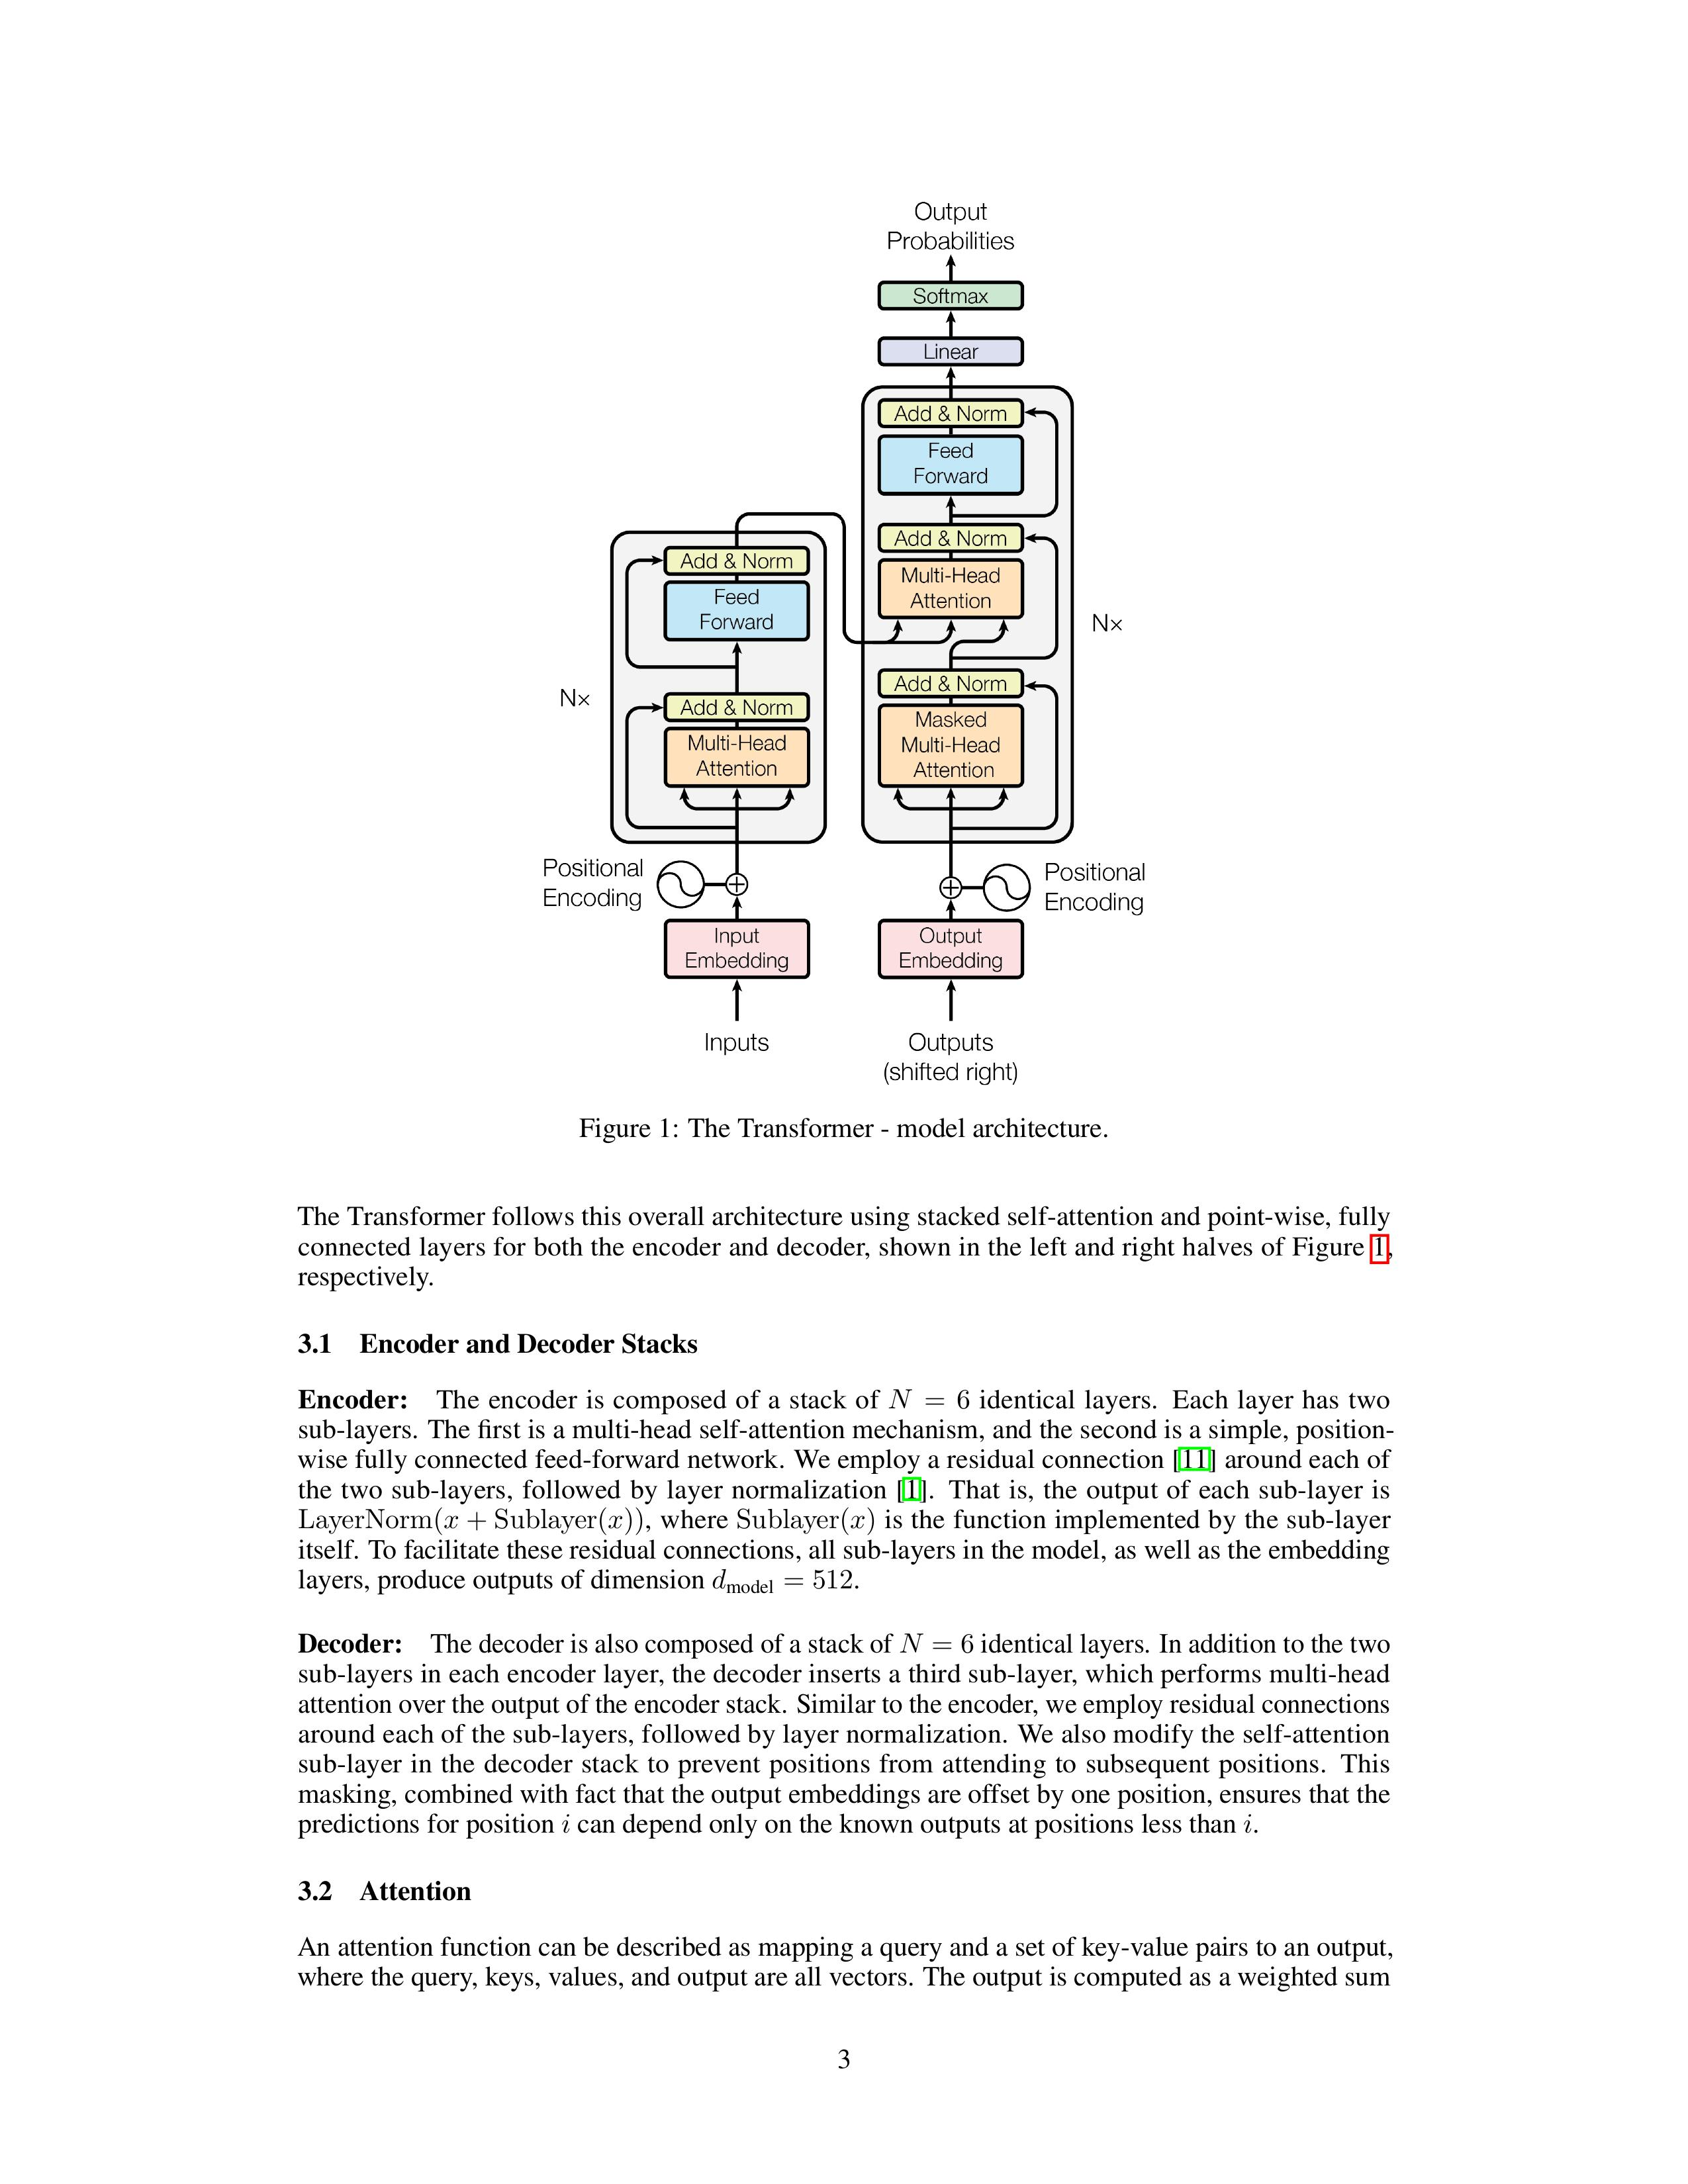

In [5]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/1706.03762v7-images-2.jpg', width=600)

In [7]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open('/content/1706.03762v7-images-2.jpg')
result = model.predict(image, conf=0.25)[0]


0: 640x512 (no detections), 42.0ms
Speed: 25.6ms preprocess, 42.0ms inference, 106.6ms postprocess per image at shape (1, 3, 640, 512)


In [8]:
result.boxes.xyxy

tensor([], device='cuda:0', size=(0, 4))

In [9]:
result.boxes.conf

tensor([], device='cuda:0')

In [10]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

In [11]:
detections

Detections(xyxy=array([], shape=(0, 4), dtype=float32), mask=None, confidence=array([], dtype=float32), class_id=array([], dtype=int64), tracker_id=None, data={'class_name': array([], dtype=float64)})

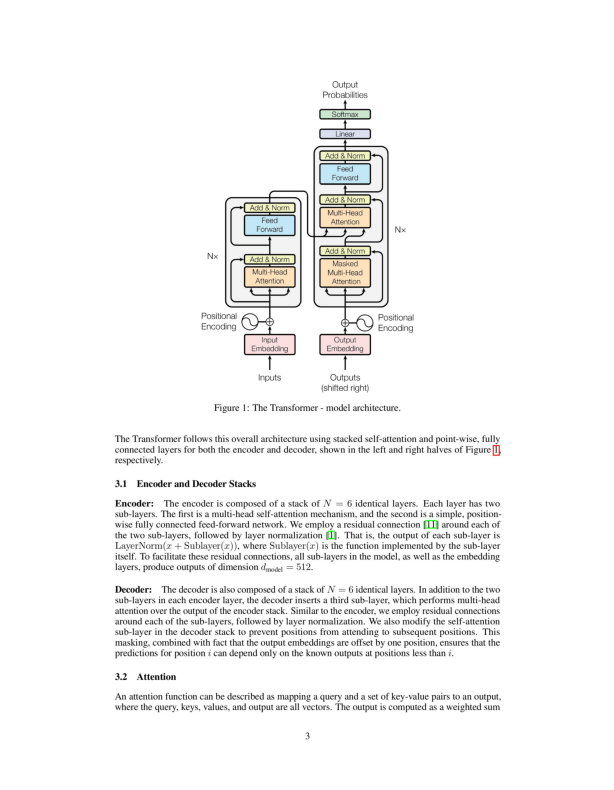

In [12]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

In [13]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open('/content/dog_image.jpeg')
result = model.predict(image, conf=0.25)[0]


0: 448x640 2 dogs, 48.3ms
Speed: 2.4ms preprocess, 48.3ms inference, 614.5ms postprocess per image at shape (1, 3, 448, 640)


In [14]:
result.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([16., 16.], device='cuda:0')
conf: tensor([0.9598, 0.9332], device='cuda:0')
data: tensor([[207.5134,  81.4240, 669.8486, 618.0345,   0.9598,  16.0000],
        [696.6082, 362.5670, 915.0813, 732.3242,   0.9332,  16.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (800, 1200)
shape: torch.Size([2, 6])
xywh: tensor([[438.6810, 349.7292, 462.3352, 536.6105],
        [805.8447, 547.4456, 218.4731, 369.7572]], device='cuda:0')
xywhn: tensor([[0.3656, 0.4372, 0.3853, 0.6708],
        [0.6715, 0.6843, 0.1821, 0.4622]], device='cuda:0')
xyxy: tensor([[207.5134,  81.4240, 669.8486, 618.0345],
        [696.6082, 362.5670, 915.0813, 732.3242]], device='cuda:0')
xyxyn: tensor([[0.1729, 0.1018, 0.5582, 0.7725],
        [0.5805, 0.4532, 0.7626, 0.9154]], device='cuda:0')

In [15]:
detections = sv.Detections.from_ultralytics(result)
detections

Detections(xyxy=array([[     207.51,      81.424,      669.85,      618.03],
       [     696.61,      362.57,      915.08,      732.32]], dtype=float32), mask=None, confidence=array([    0.95984,     0.93323], dtype=float32), class_id=array([16, 16]), tracker_id=None, data={'class_name': array(['dog', 'dog'], dtype='<U3')})

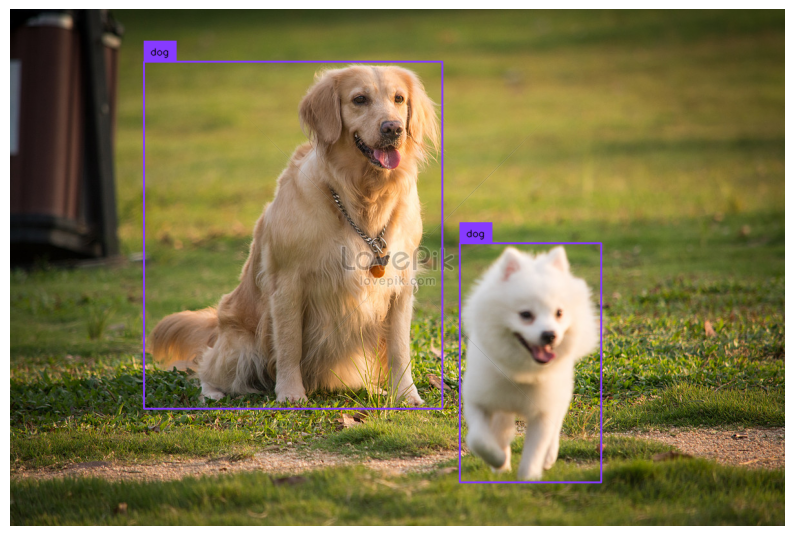

In [16]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

In [17]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="syC1Mcmr8wpAe3by25kx")
project = rf.workspace("roboflow-jvuqo").project("tft-id-6128g")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TFT-ID-1 in yolov11:: 100%|██████████| 14646/14646 [00:20<00:00, 712.48it/s] 


In [18]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=5 imgsz=640 plots=True

/content
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/TFT-ID-1/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

In [19]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1731047223.335836acd4fb.7733.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


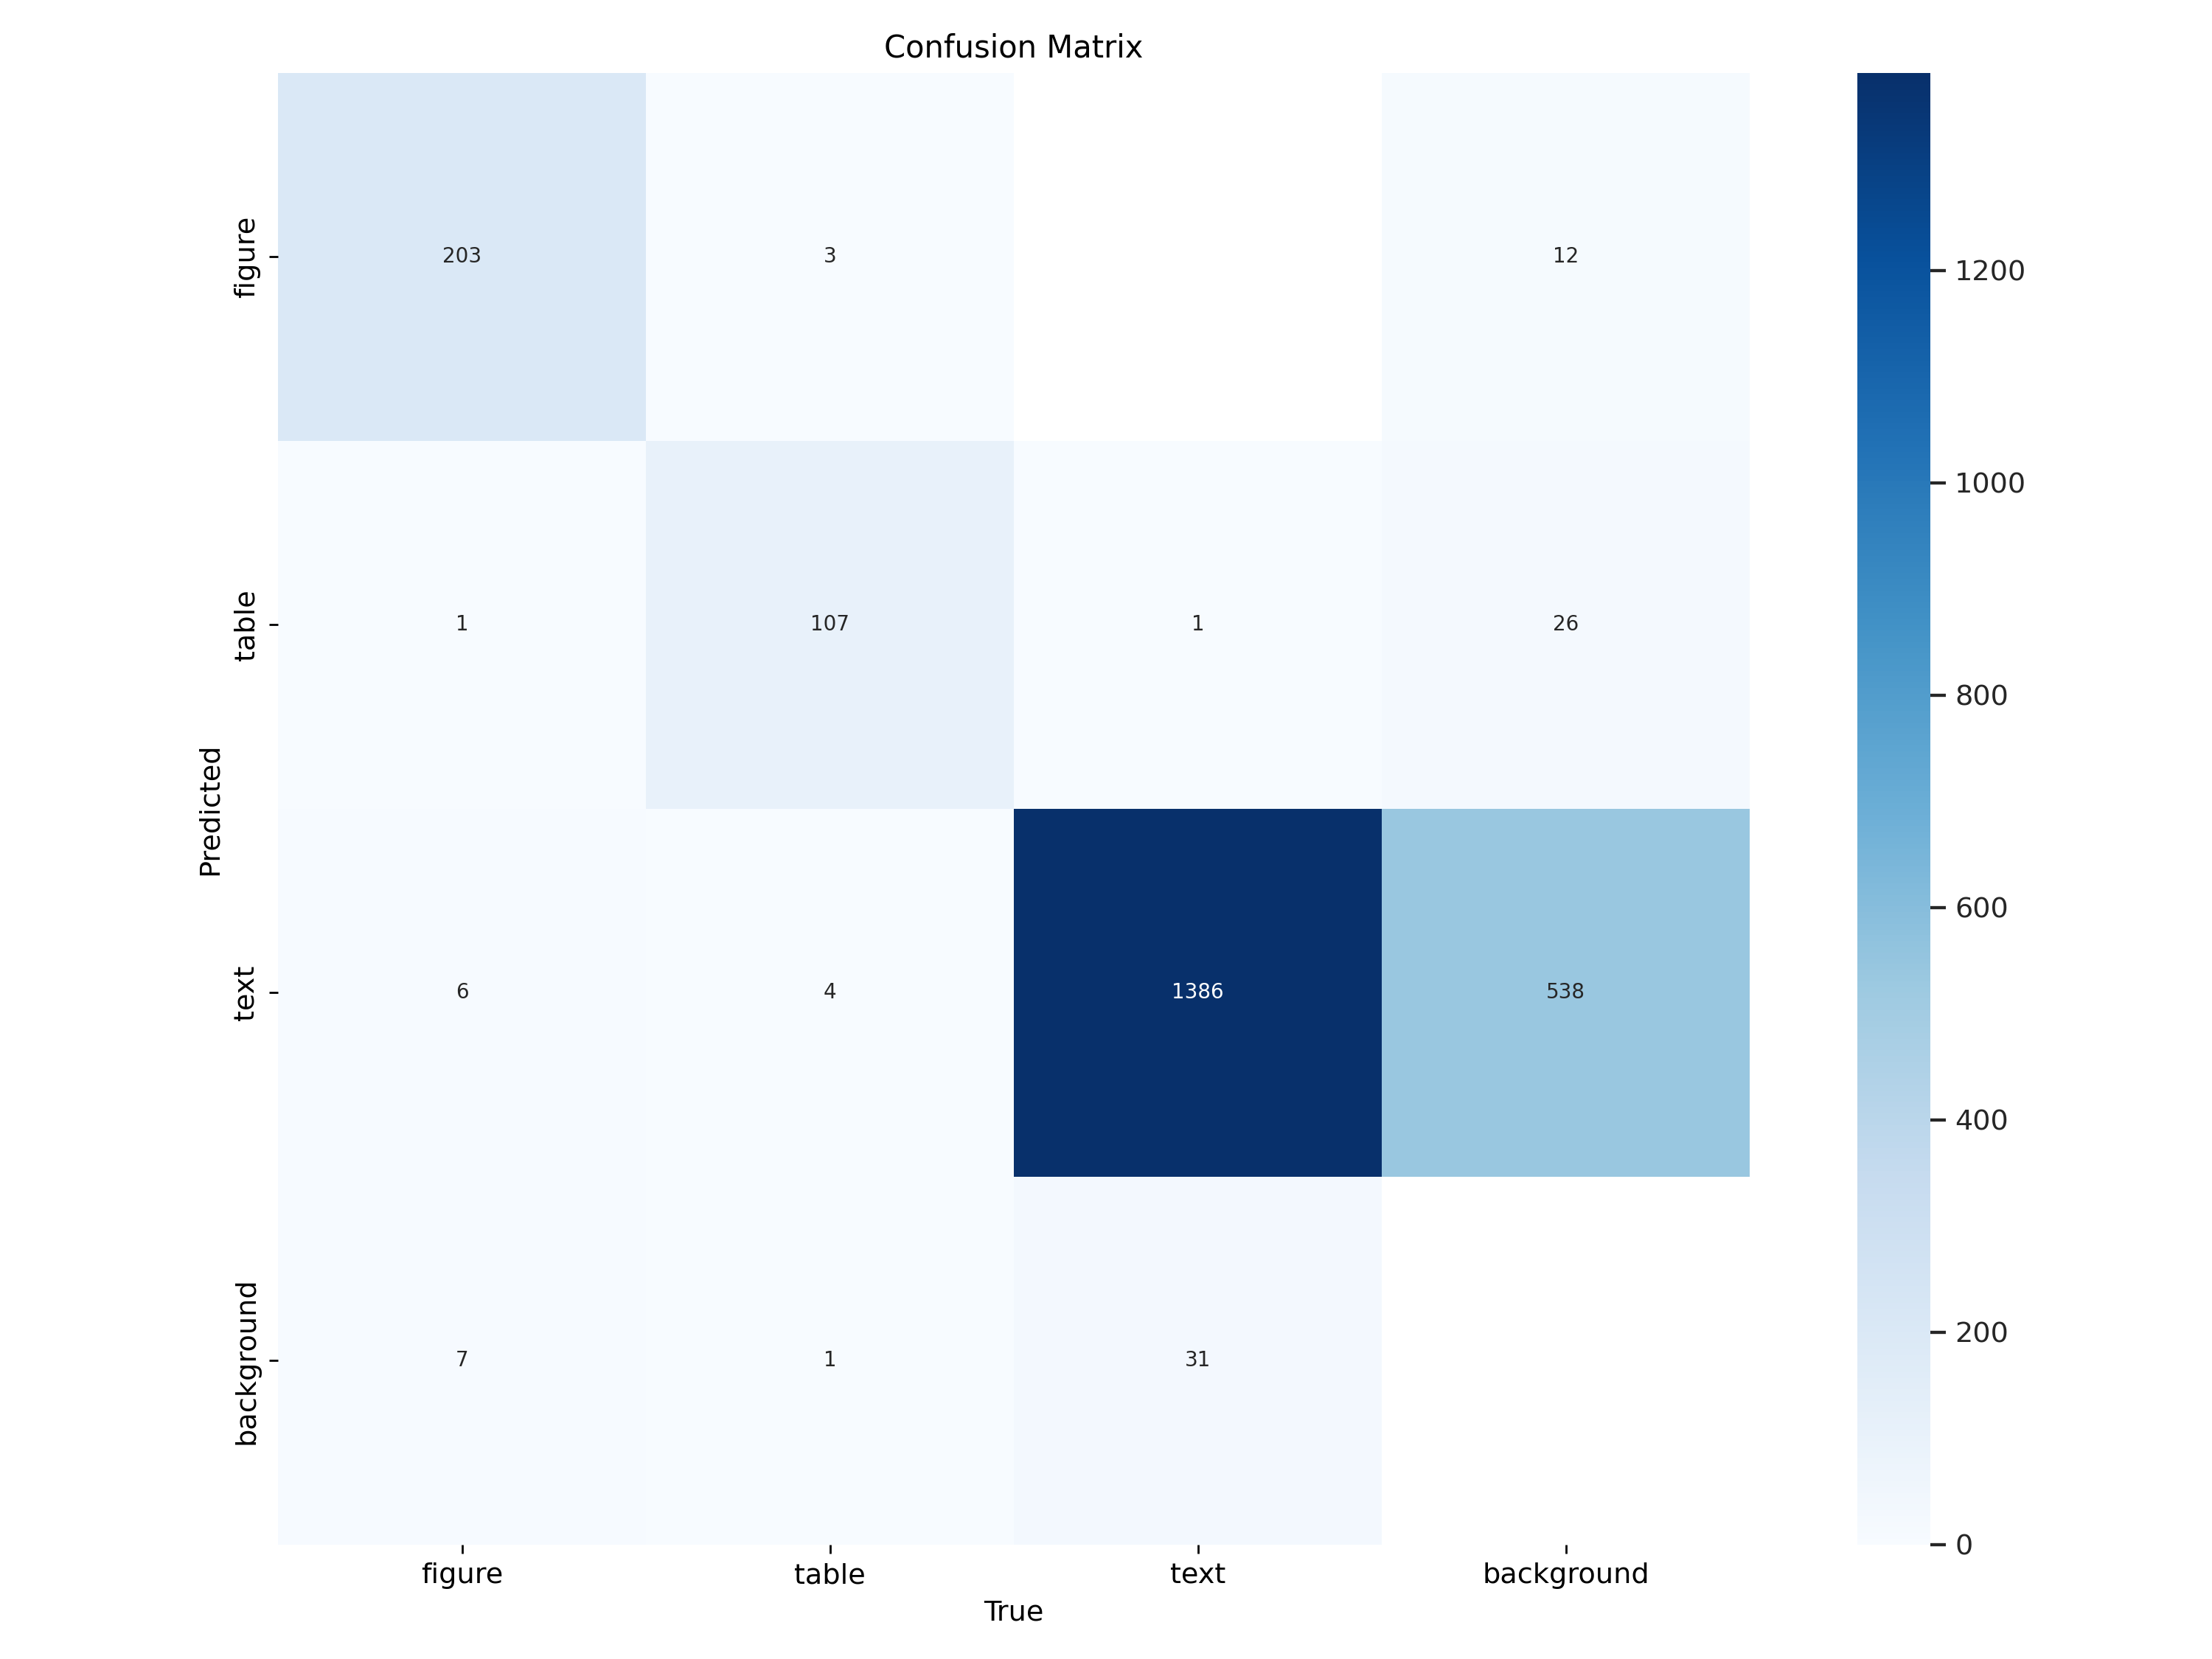

In [20]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

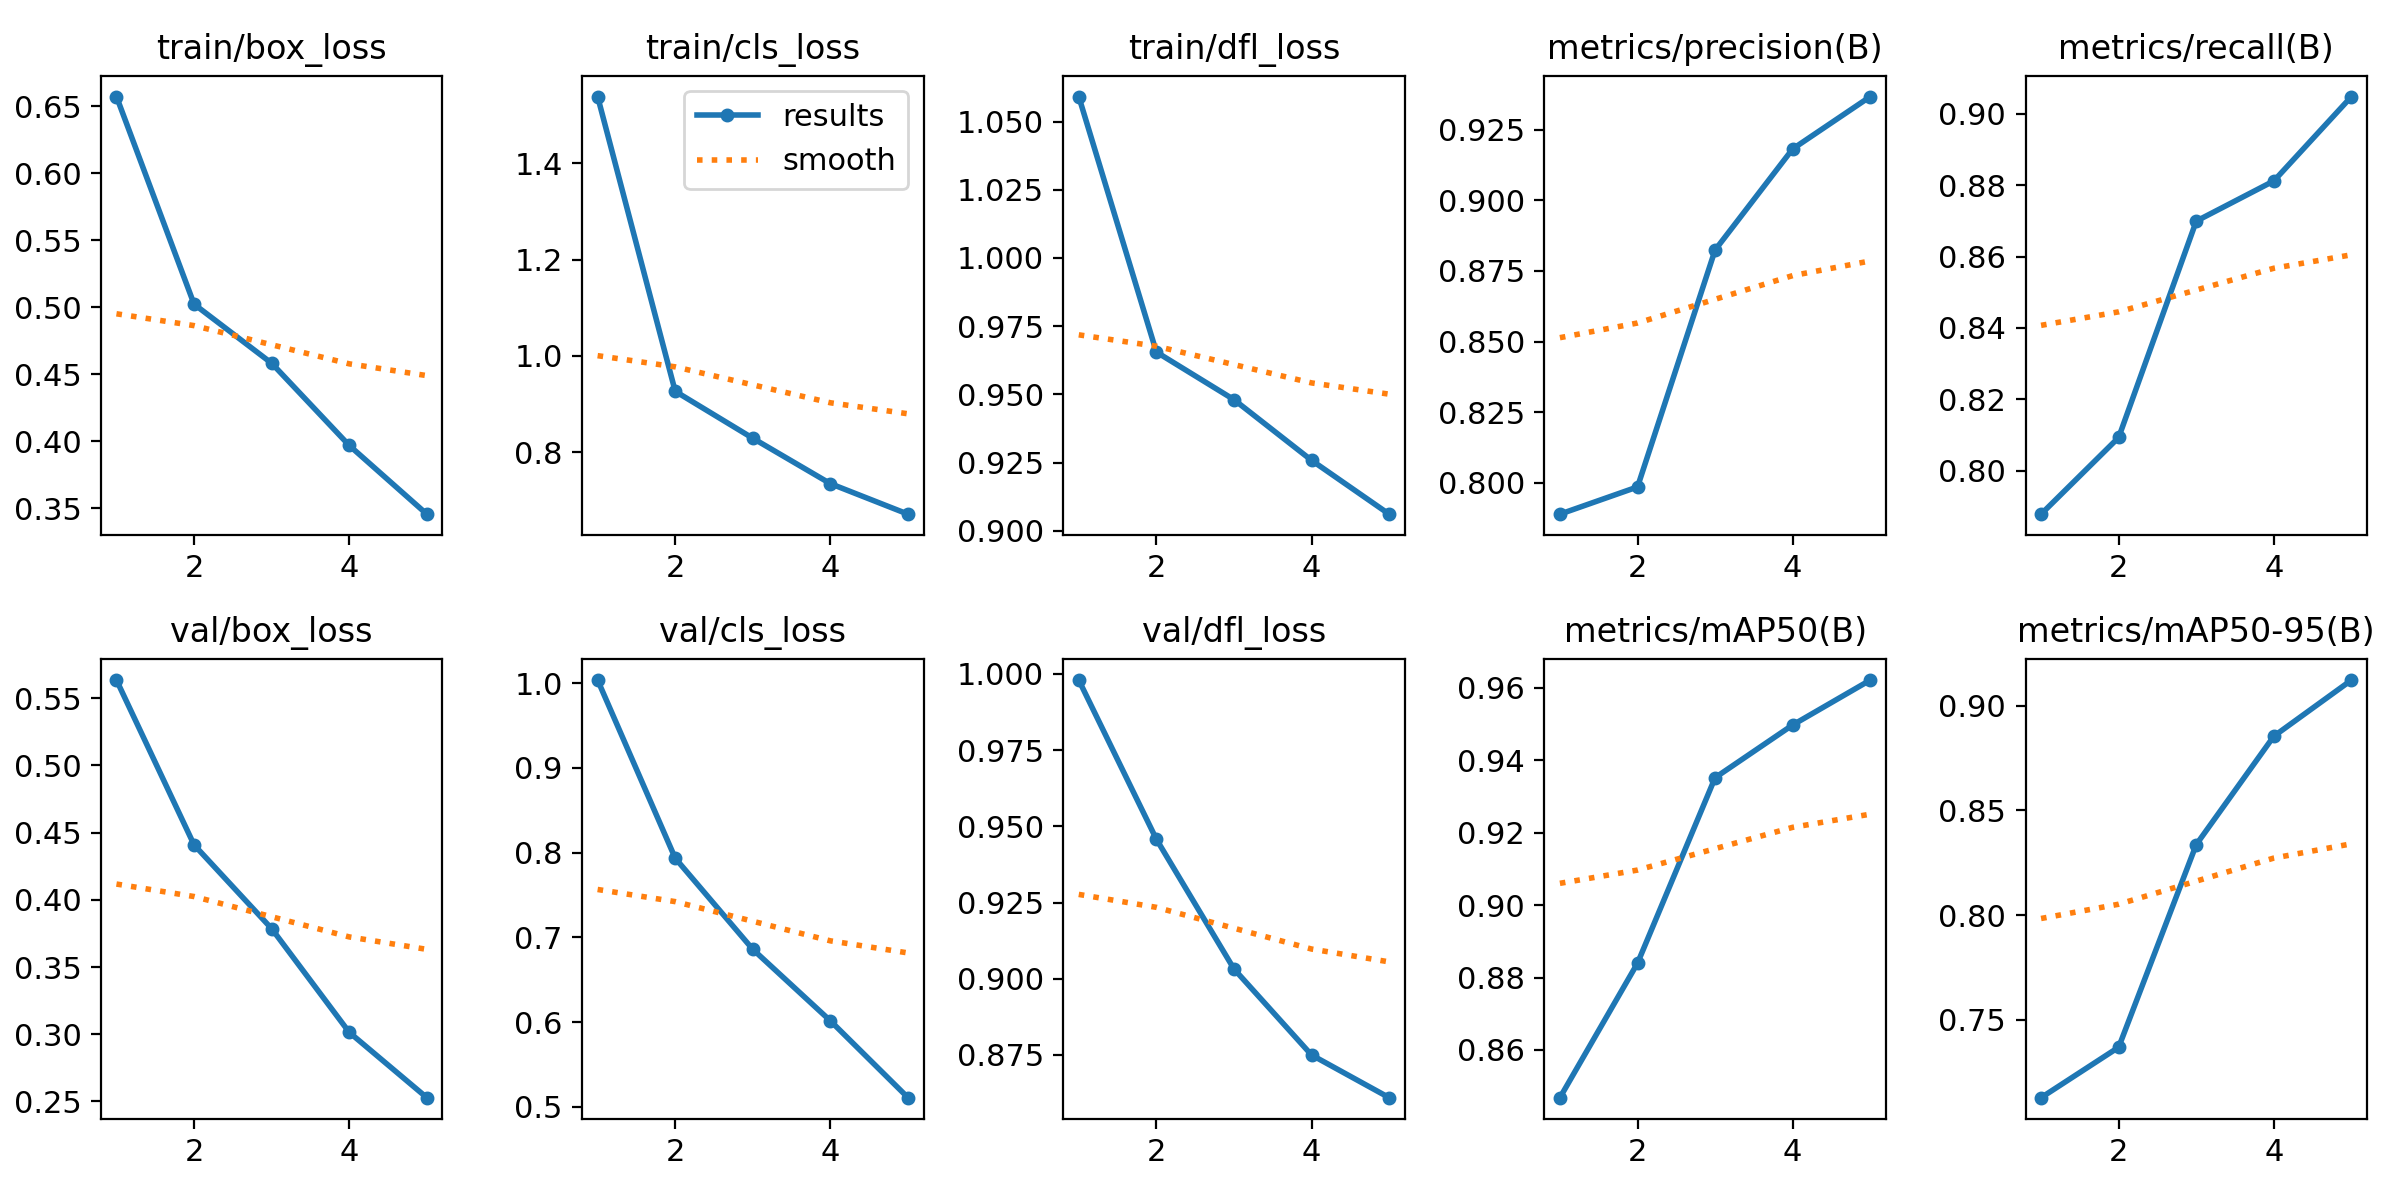

In [22]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

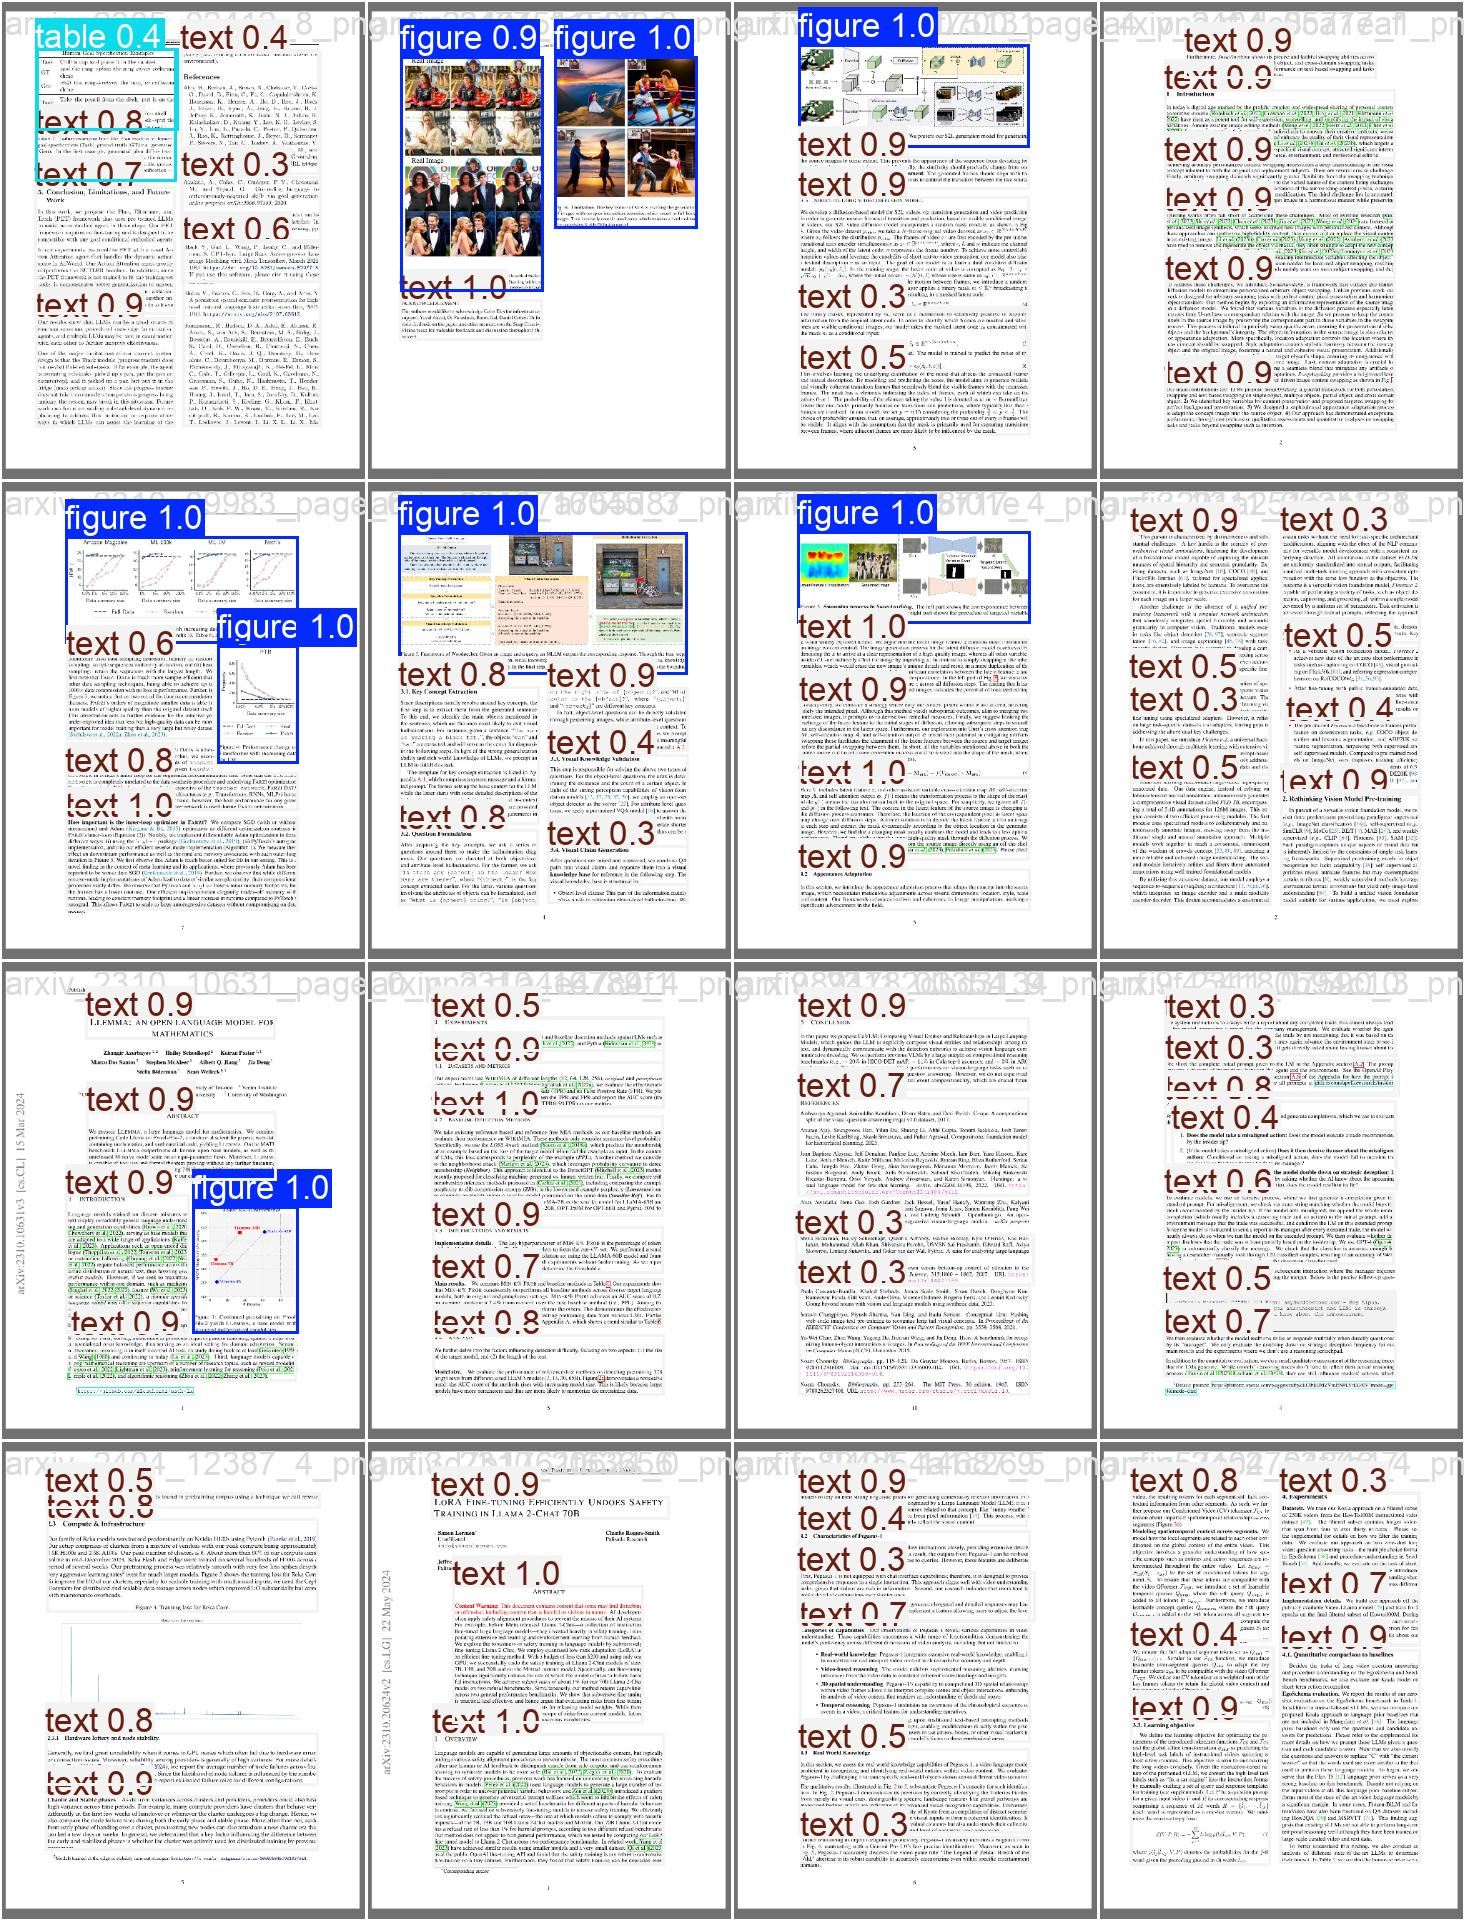

In [23]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=640)

In [24]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.50 source={dataset.location}/test/images save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/364 /content/TFT-ID-1/test/images/arxiv_2305_02412_3_png.rf.ec72bfe284252d3168168d2b537c82de.jpg: 640x512 1 figure, 3 texts, 41.4ms
image 2/364 /content/TFT-ID-1/test/images/arxiv_2305_02412_7_png.rf.e24581659595f5c087e0cfbeb05ed61c.jpg: 640x512 1 figure, 2 tables, 3 texts, 10.9ms
image 3/364 /content/TFT-ID-1/test/images/arxiv_2305_02665_4_png.rf.e1421555c7cc85527166d0f7da46a1a1.jpg: 640x480 1 figure, 4 texts, 42.3ms
image 4/364 /content/TFT-ID-1/test/images/arxiv_2305_02968_3_png.rf.2ac98b4f9563817e3bc955ebee06951f.jpg: 640x512 1 figure, 5 texts, 9.5ms
image 5/364 /content/TFT-ID-1/test/images/arxiv_2305_03689_0_png.rf.5ed9a503e4c00a2386ef582609ec6c26.jpg: 640x512 3 texts, 9.2ms
image 6/364 /content/TFT-ID-1/test/images/arxiv_2305_03981_7_png.rf.15aacbf15d8f11891df079aab0568ed5.jpg: 640x480 2 figures, 1 table, 3 

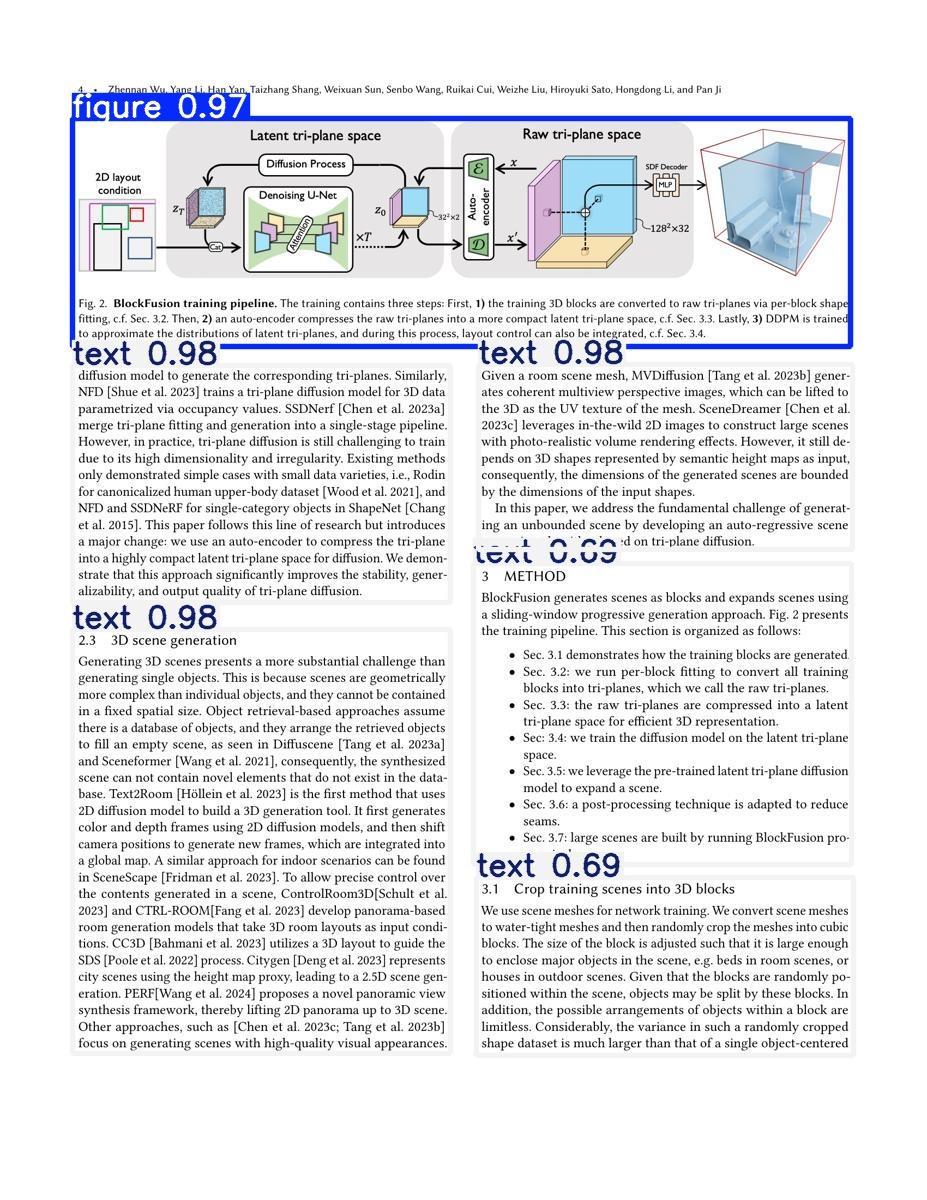

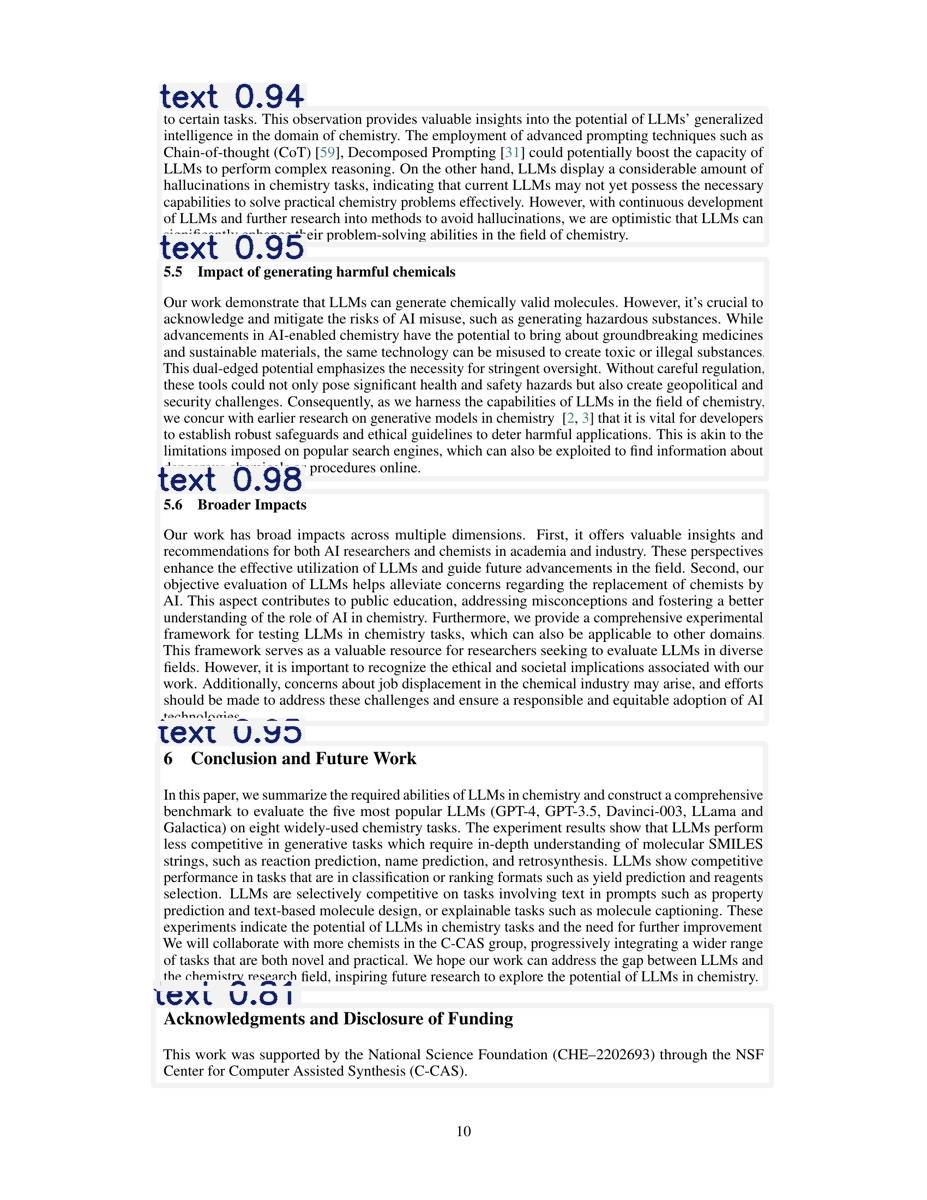

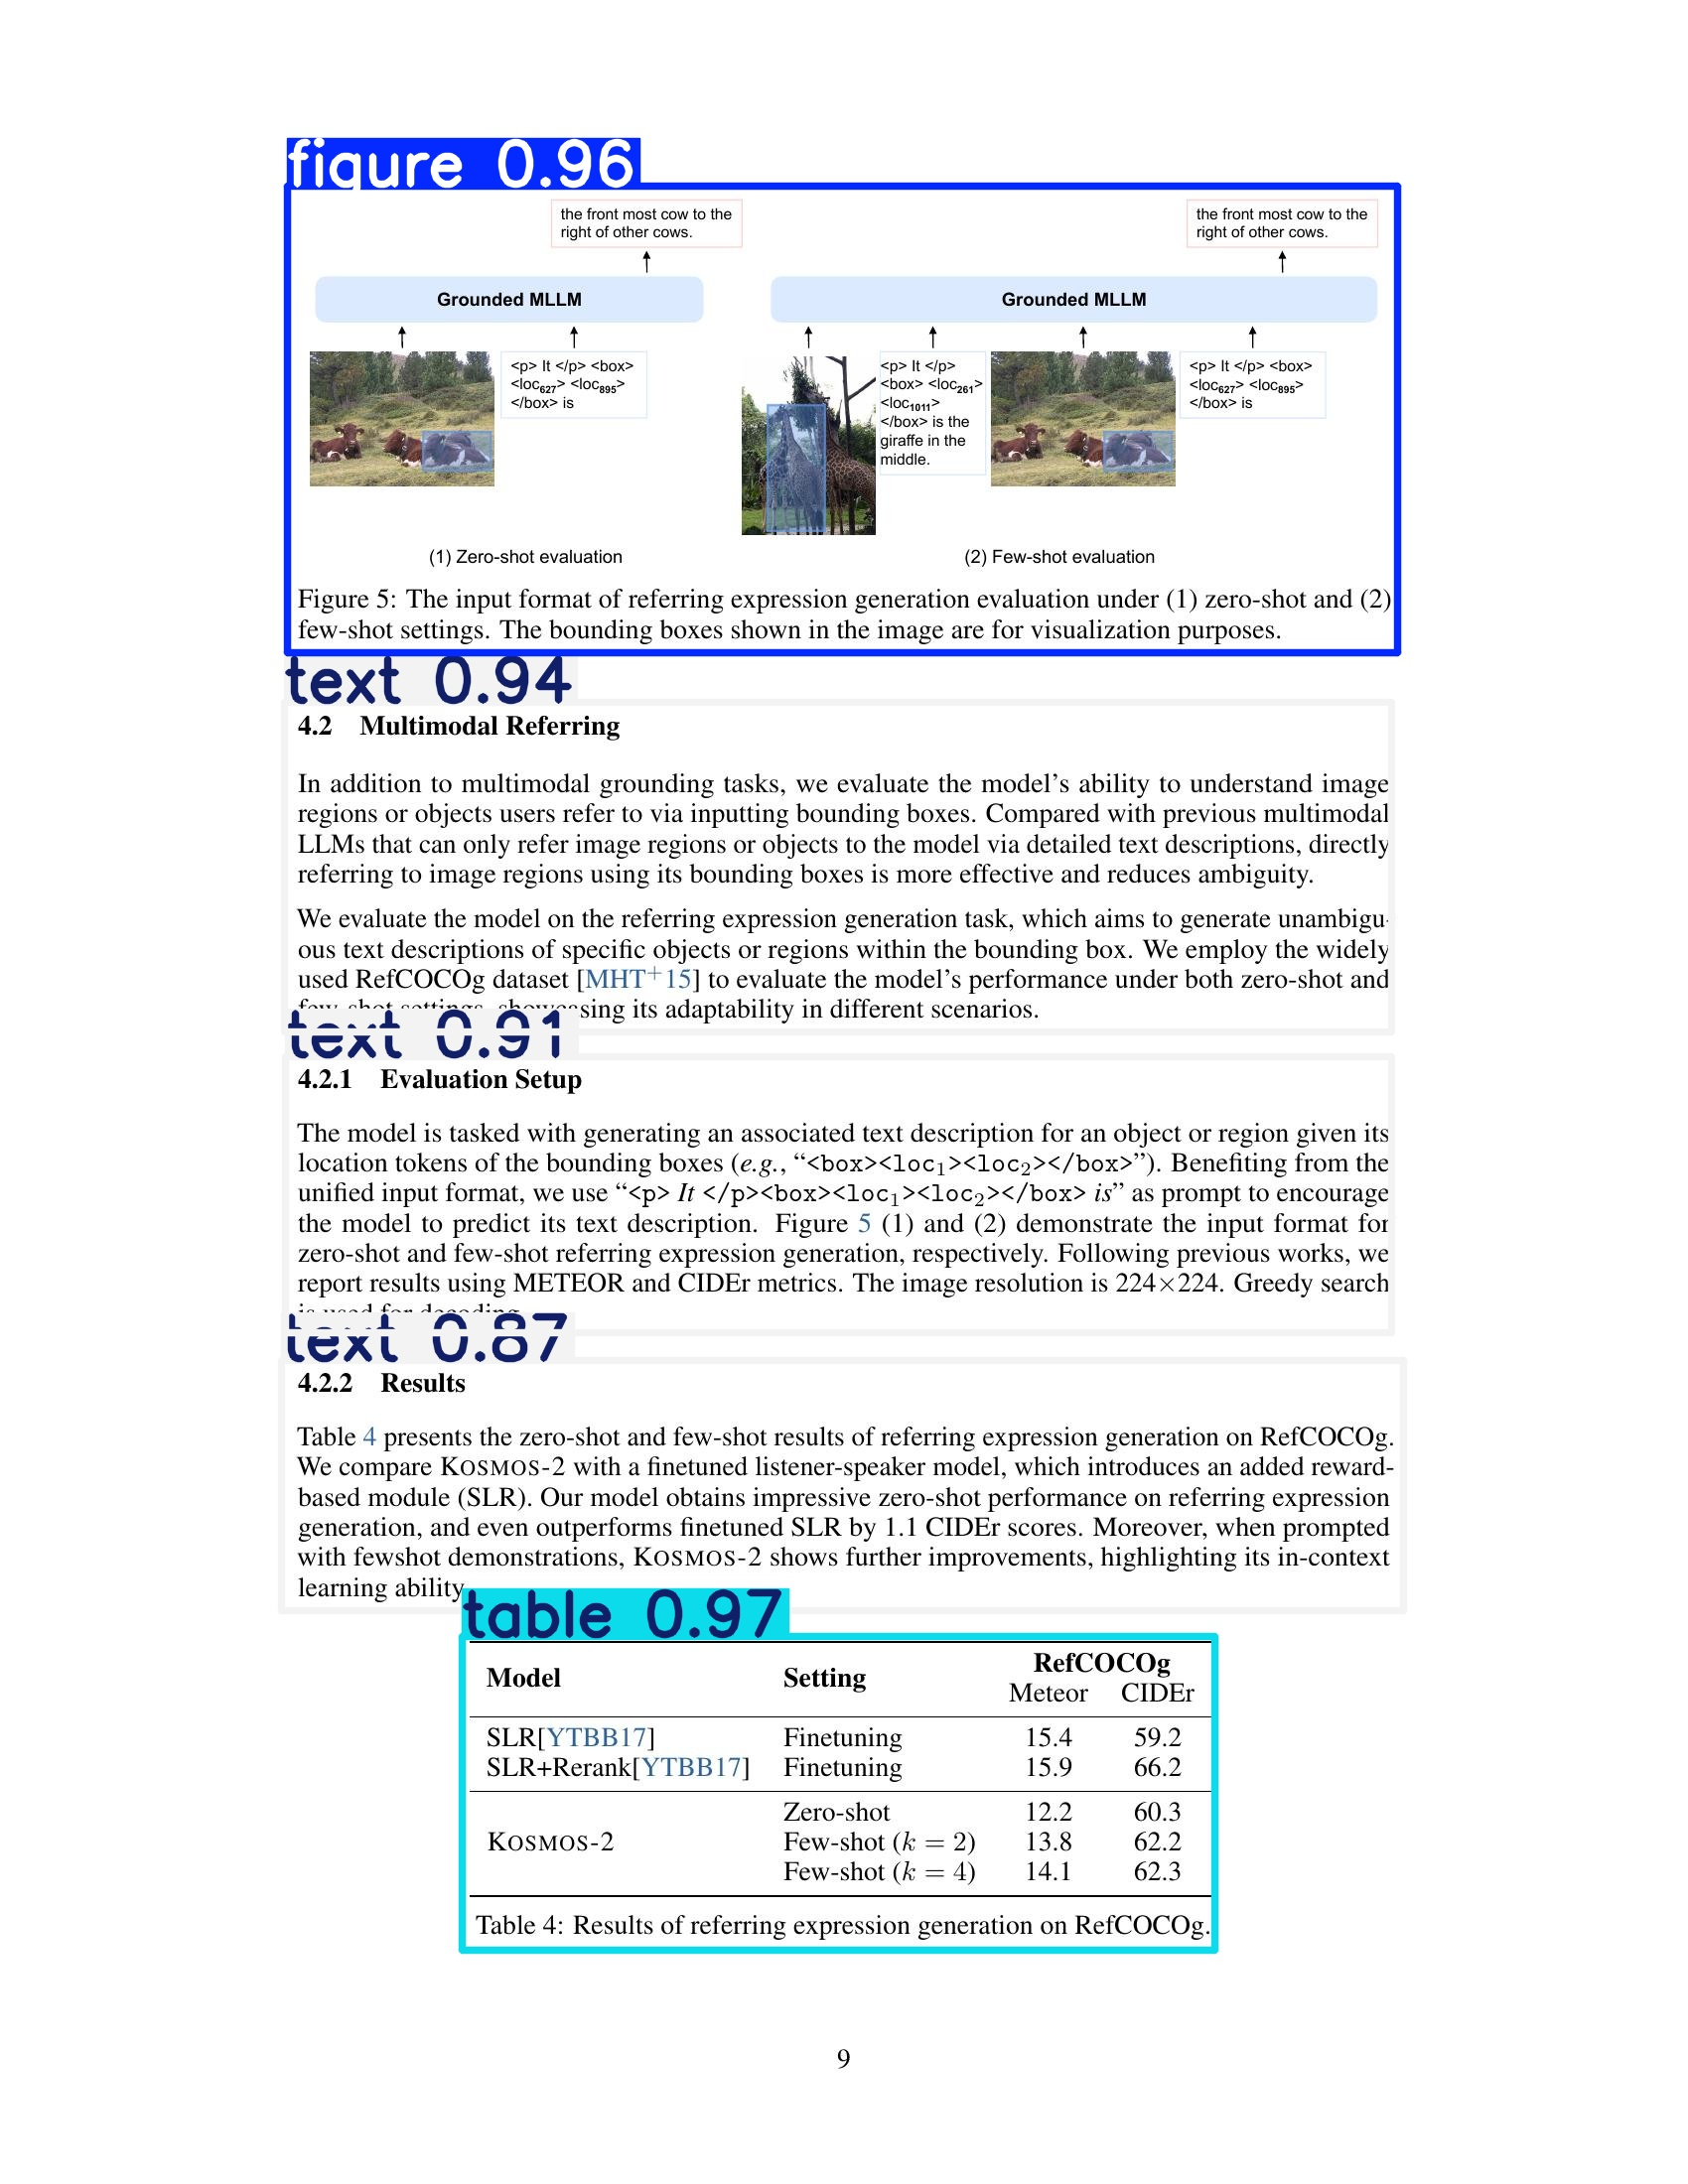

In [25]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [26]:
from ultralytics import YOLO

# Load the custom model
model_loaded = YOLO('/content/runs/detect/train/weights/best.pt')


0: 640x512 1 figure, 3 texts, 15.5ms
Speed: 3.4ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


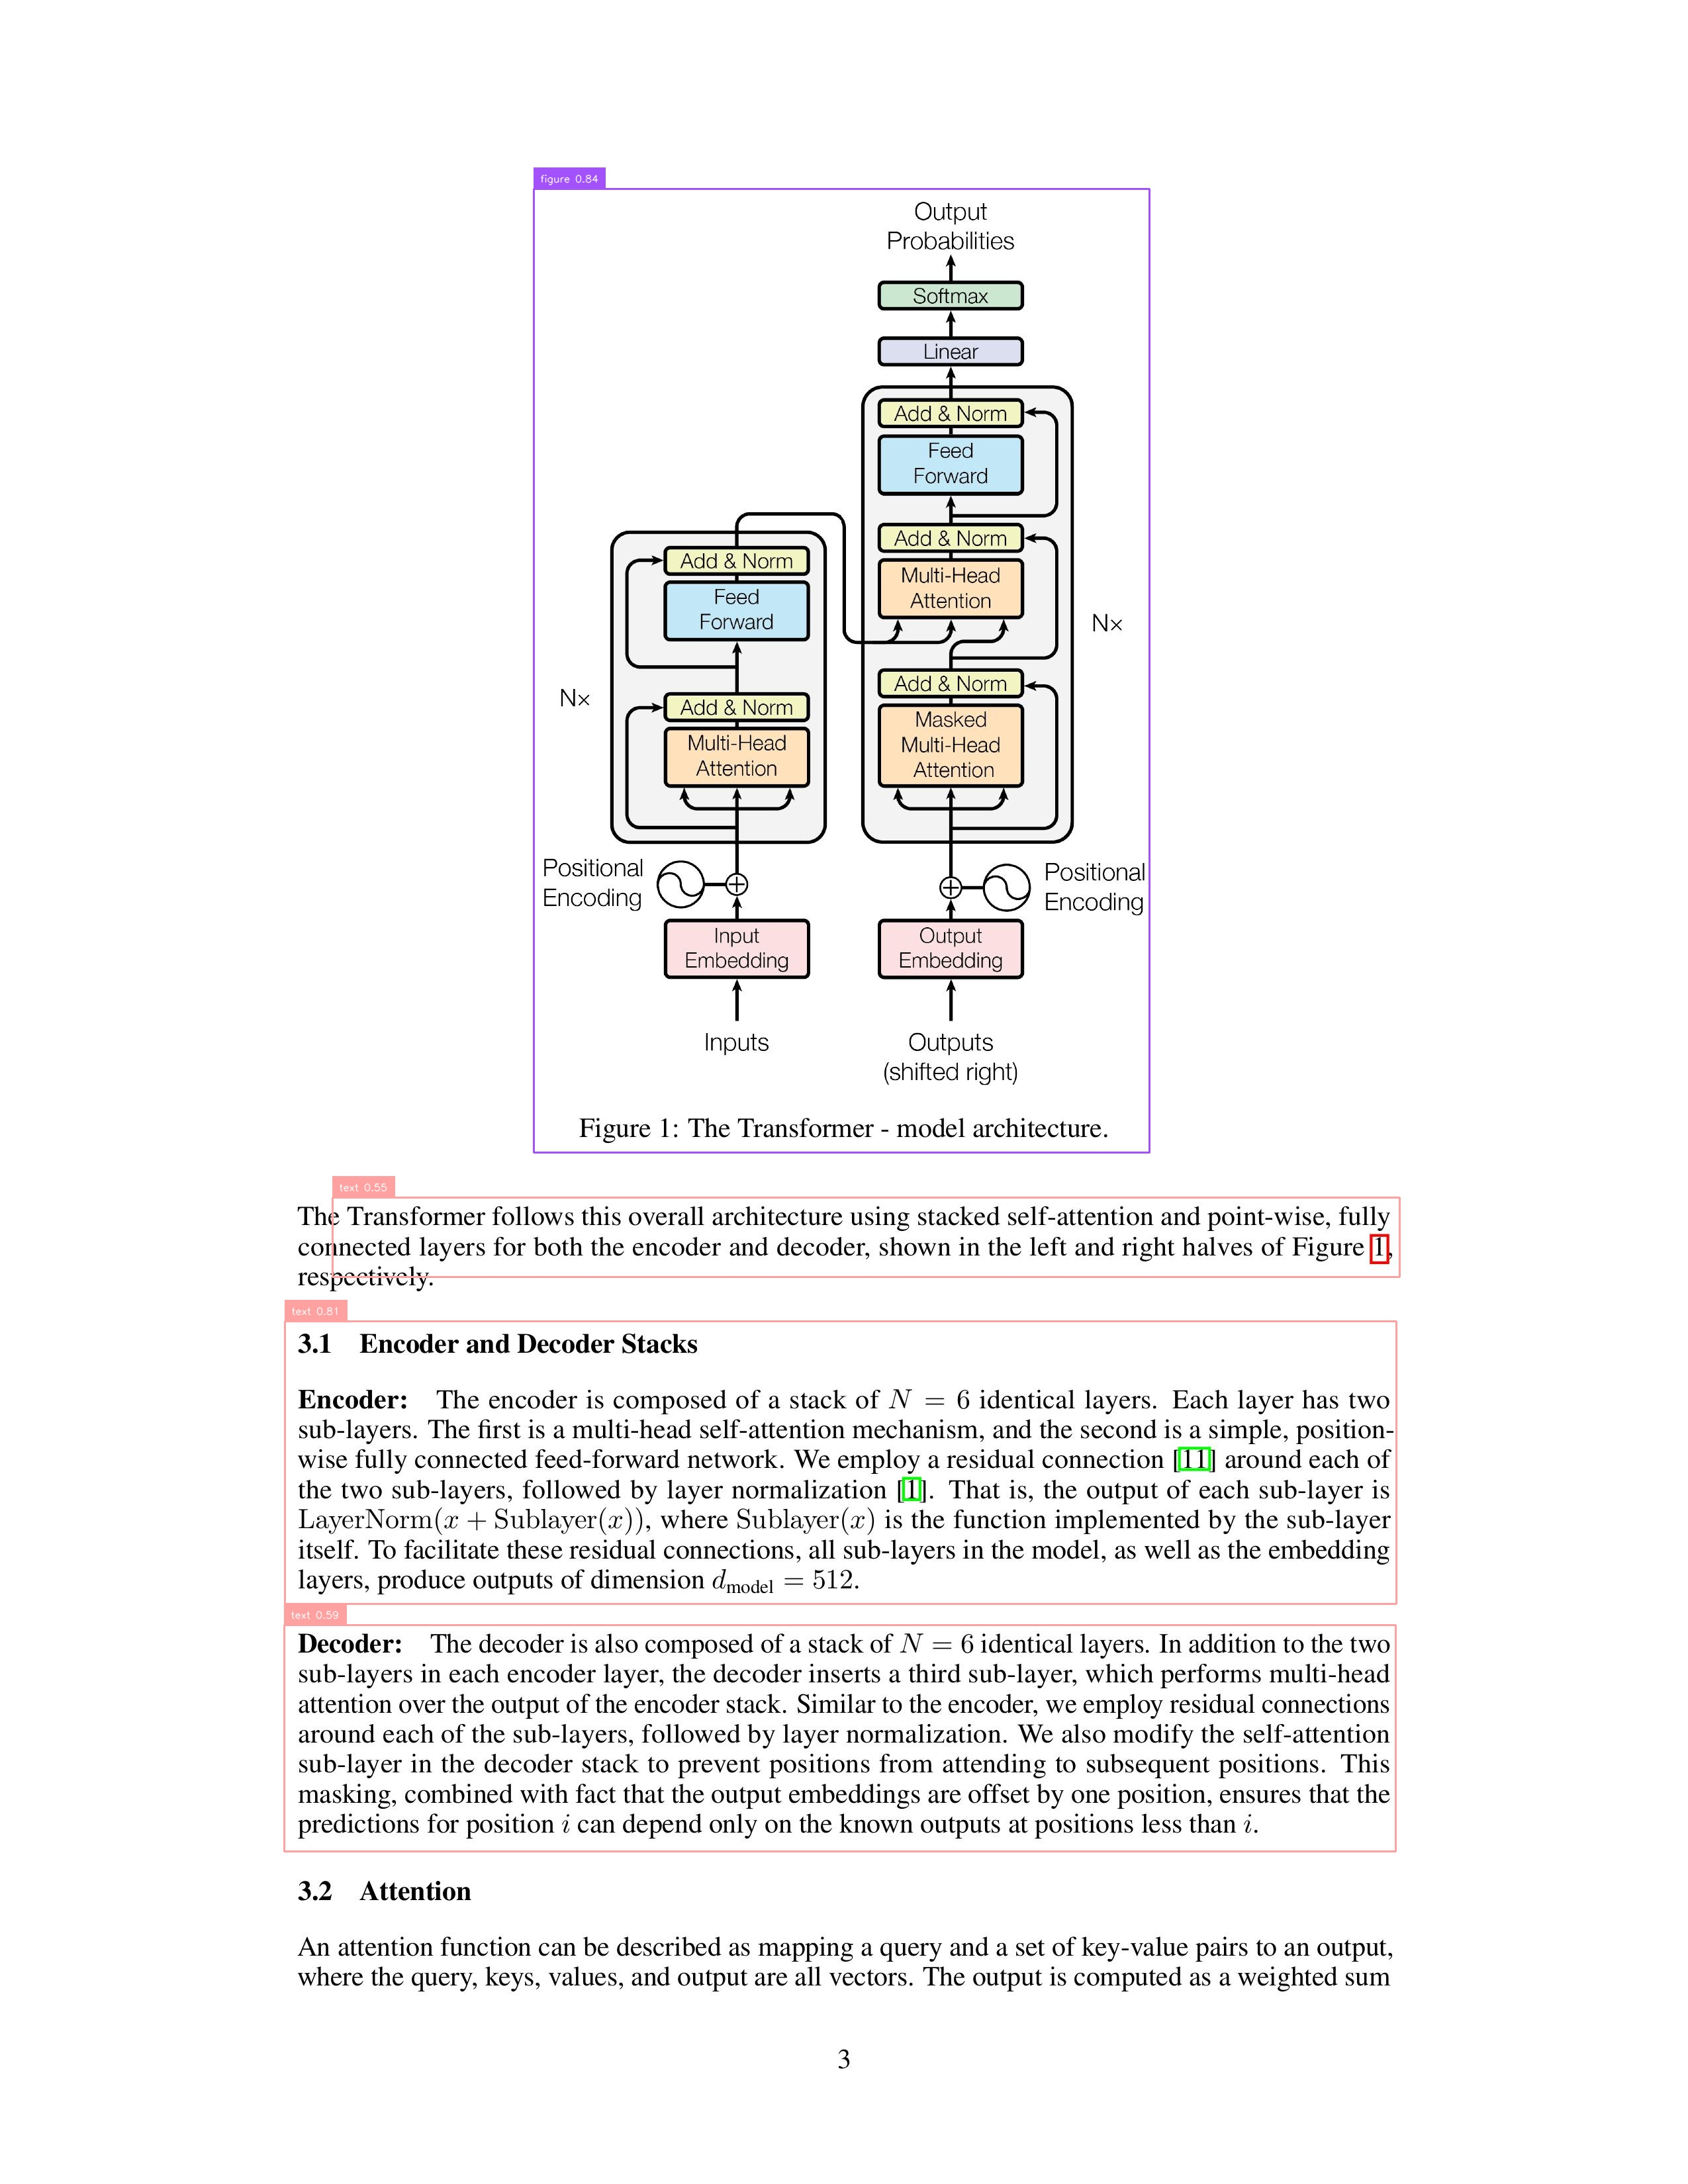

Number of detections: 4
Detection: figure, Confidence: 0.84, Coordinates: [     806.48      285.89      1736.6      1741.9]
Detection: text, Confidence: 0.81, Coordinates: [     430.27      1996.7      2109.3      2423.8]
Detection: text, Confidence: 0.59, Coordinates: [     429.35      2455.7        2108      2797.1]
Detection: text, Confidence: 0.55, Coordinates: [     502.13      1809.7      2114.6      1929.2]


In [27]:
import cv2
import supervision as sv
from ultralytics import YOLO
import IPython

# Load the custom model
model_loaded = YOLO('/content/runs/detect/train/weights/best.pt')

# Specify the path to your single image
image_path = '/content/1706.03762v7-images-2.jpg'  # Replace with your actual image path

# Load image
image = cv2.imread(image_path)

# Perform inference with labels
results = model_loaded(image, conf=0.50)[0]

# Create Detections with labels
detections = sv.Detections(
    xyxy=results.boxes.xyxy.cpu().numpy(),
    confidence=results.boxes.conf.cpu().numpy(),
    class_id=results.boxes.cls.cpu().numpy().astype(int)
)

# Get class names from the model
class_names = model_loaded.names

# Annotate boxes and labels with class names
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(
    text_scale=0.5,  # Adjust text size if needed
    text_thickness=1,  # Adjust text thickness  # You can customize color palette
)

# Annotate the image with detections and their labels
annotated_image = box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image,
    detections=detections,
    labels=[f"{class_names[class_id]} {confidence:.2f}" for class_id, confidence in zip(detections.class_id, detections.confidence)]
)

# Display annotated image
_, buffer = cv2.imencode('.jpg', annotated_image)
i = IPython.display.Image(data=buffer)
IPython.display.display(i)

# Print detection details
print("Number of detections:", len(detections))
for box, conf, cls in zip(detections.xyxy, detections.confidence, detections.class_id):
    print(f"Detection: {class_names[cls]}, Confidence: {conf:.2f}, Coordinates: {box}")